In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Load the dataset
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [26]:
 # Check for missing values
 print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [27]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [28]:
 # Check for duplicates
 data.drop_duplicates(inplace=True)

In [29]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')

# Now extract day, month, and year
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Check the result
print(data.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-08-11  North   1254      0.12  401.28  Tamil Nadu       11.0   
1 2017-08-11  South    749      0.18  149.80  Tamil Nadu       11.0   
2 2017-12-06   West   2360      0.21  165.20  Tamil Nadu        6.0   
3 2016-11-10  South    896      0.25   89.60  Tamil Nadu       10.0   
4 2016-11-10  South   2355      0.26  918.45  Tamil Nadu       10.0   

   Order Month  Order Year  
0          8.0      2017.0  
1          8.0      2017.0  
2         12.0      201

<ipython-input-30-92389df7df08>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




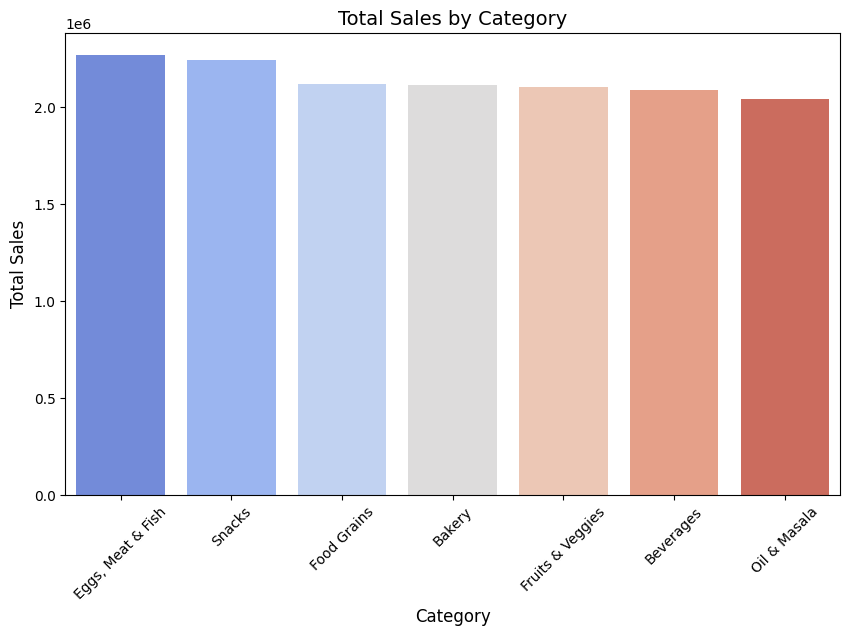

In [30]:
# Total sales by Category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

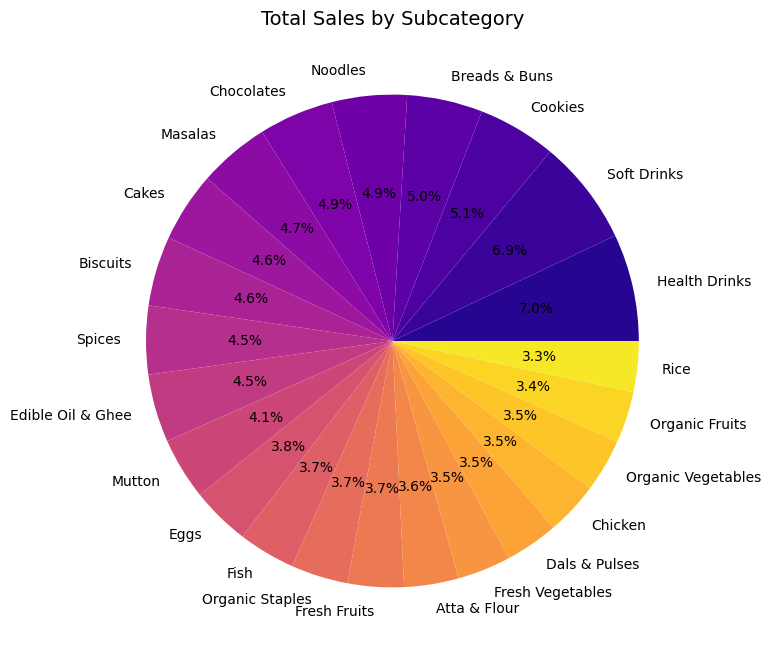

In [31]:
# Total sales by Subcategory
subcategory_sales = data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(subcategory_sales, labels=subcategory_sales.index, autopct='%1.1f%%', colors=sns.color_palette('plasma', len(subcategory_sales)))
plt.title('Total Sales by Subcategory', fontsize=14)
plt.show()

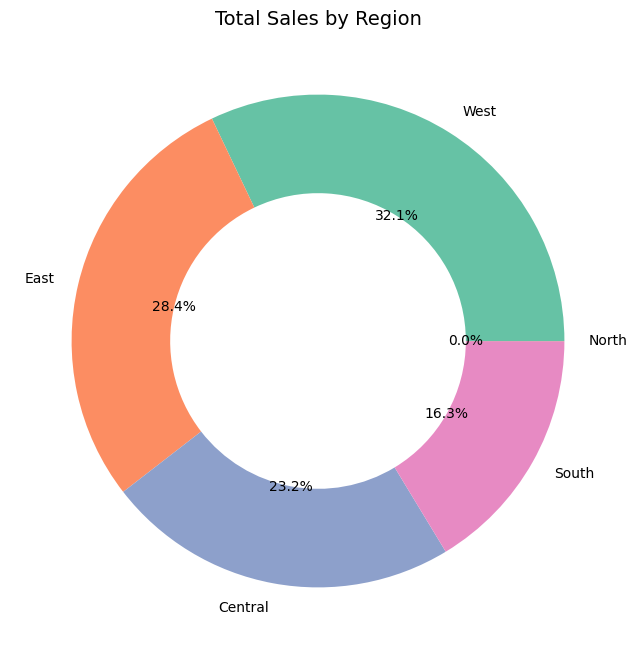

In [32]:
# Total sales by Region
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Donut Chart
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(region_sales)), wedgeprops={'width':0.4})
plt.title('Total Sales by Region', fontsize=14)
plt.show()

<ipython-input-33-b5a28e04bb1d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




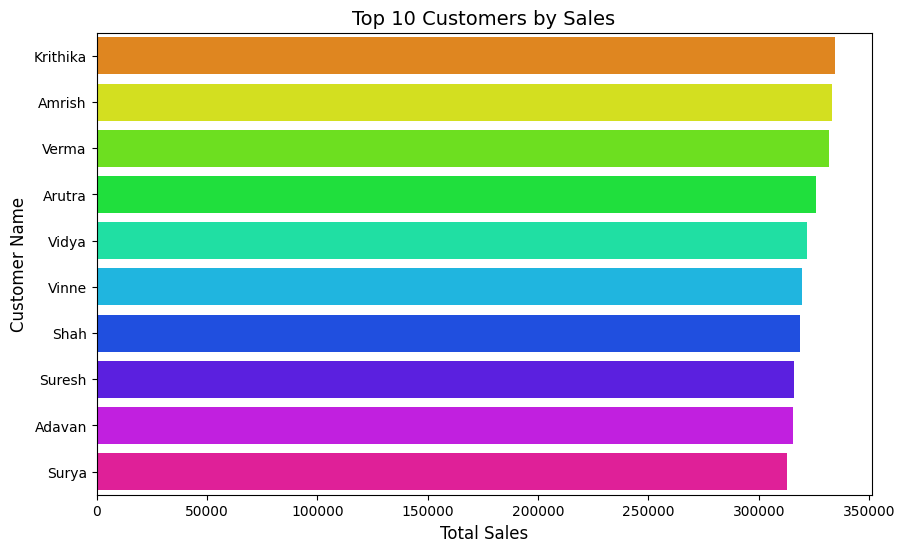

In [33]:
# Top customers by Sales
top_customers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Horizontal Bar Chart with custom colors
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette=sns.color_palette("hsv", 10))
plt.title('Top 10 Customers by Sales', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.show()

<ipython-input-34-3313317d0205>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




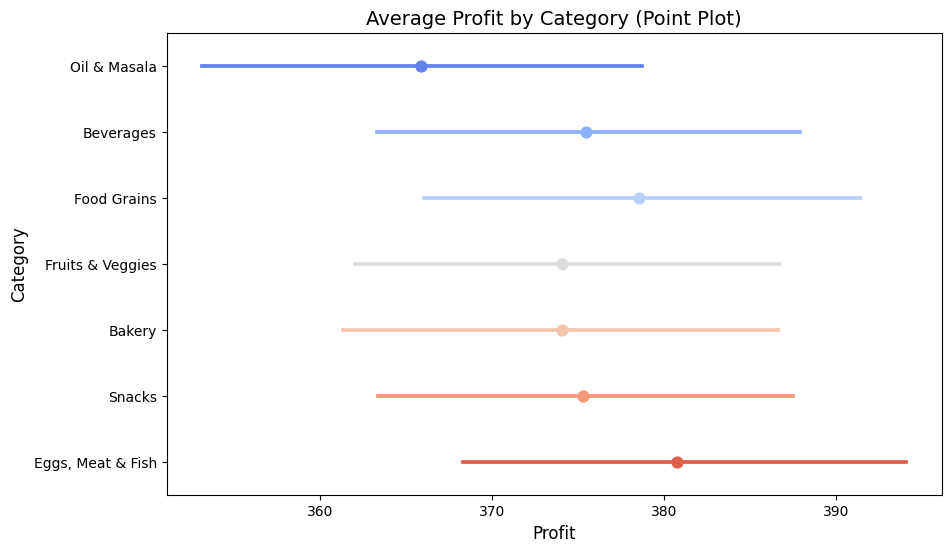

In [34]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Profit', y='Category', data=data, palette='coolwarm')
plt.title('Average Profit by Category (Point Plot)', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

<ipython-input-35-8c1bb5cc93af>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




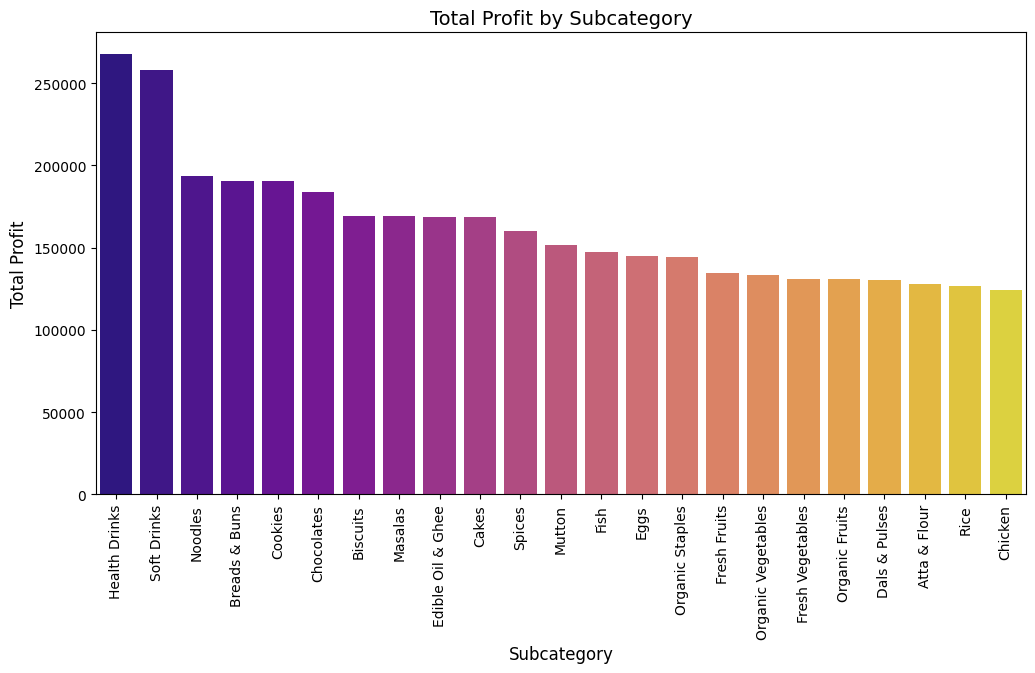

In [35]:
# Profit by Subcategory
subcategory_profit = data.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values, palette='plasma')
plt.title('Total Profit by Subcategory', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [36]:
# Correlation between Discount and Sales
discount_sales_corr = data['Discount'].corr(data['Sales'])

# Correlation between Discount and Profit
discount_profit_corr = data['Discount'].corr(data['Profit'])

# Print correlation results
print(f'Correlation between Discount and Sales: {discount_sales_corr}')
print(f'Correlation between Discount and Profit: {discount_profit_corr}')

Correlation between Discount and Sales: -0.0055124876300147755
Correlation between Discount and Profit: 1.7476233317140046e-05


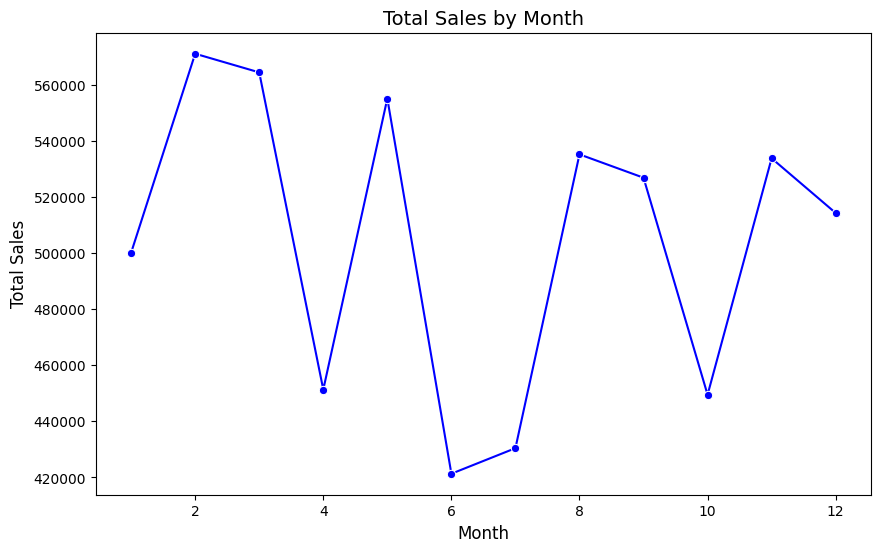

In [37]:
# Total sales by month
monthly_sales = data.groupby('Order Month')['Sales'].sum()

# Visualization
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Total Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

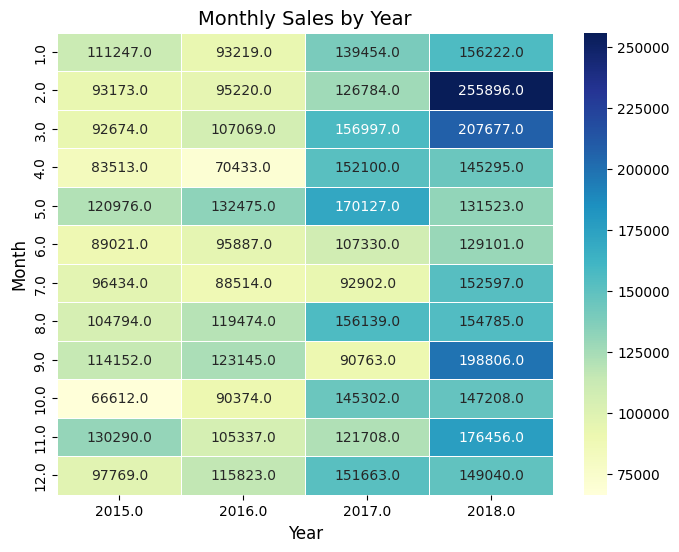

In [38]:
# Yearly Sales comparison
yearly_sales = data.groupby('Order Year')['Sales'].sum().reset_index()

# Heatmap (Using pivot table to show yearly sales in a heatmap)
pivot_data = data.pivot_table(values='Sales', index='Order Month', columns='Order Year', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Monthly Sales by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

<ipython-input-39-98cb7598e09b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




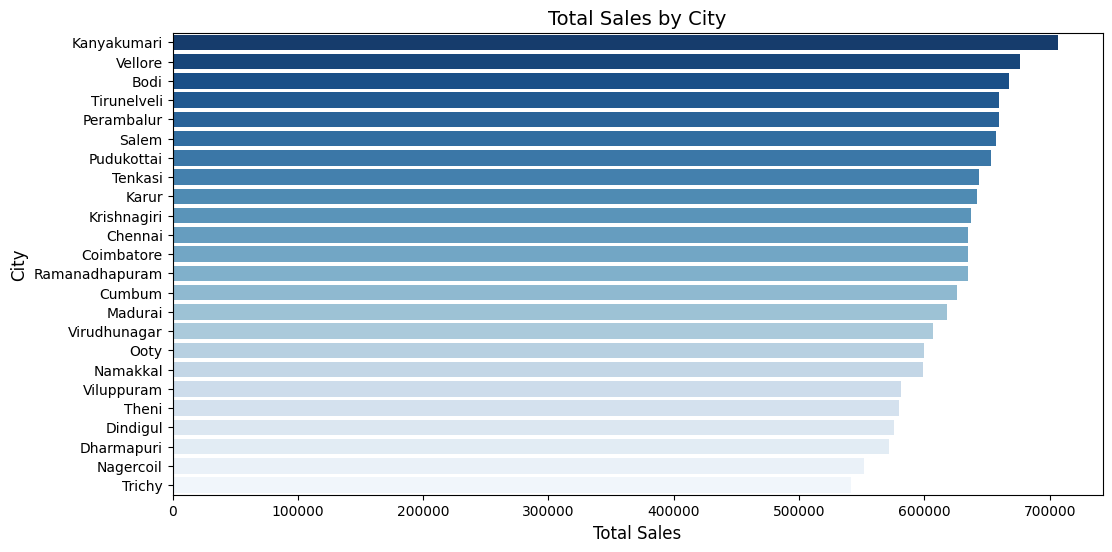

In [39]:
# Total sales by City
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Horizontal Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='Blues_r')
plt.title('Total Sales by City', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

               City           Category   Sales
3              Bodi        Food Grains  110635
9           Chennai  Eggs, Meat & Fish  107363
14       Coimbatore             Bakery  103372
23           Cumbum  Eggs, Meat & Fish  109481
28       Dharmapuri             Bakery   87535
41         Dindigul             Snacks   99846
47      Kanyakumari       Oil & Masala  124040
51            Karur  Eggs, Meat & Fish  114088
58      Krishnagiri  Eggs, Meat & Fish  107868
64          Madurai          Beverages  111161
74        Nagercoil   Fruits & Veggies  107409
77         Namakkal             Bakery   96081
87             Ooty        Food Grains  101319
97       Perambalur             Snacks  111666
102      Pudukottai   Fruits & Veggies  107575
107  Ramanadhapuram  Eggs, Meat & Fish  107164
112           Salem             Bakery  113672
121         Tenkasi  Eggs, Meat & Fish  107247
129           Theni        Food Grains   96184
139     Tirunelveli             Snacks  107919
142          

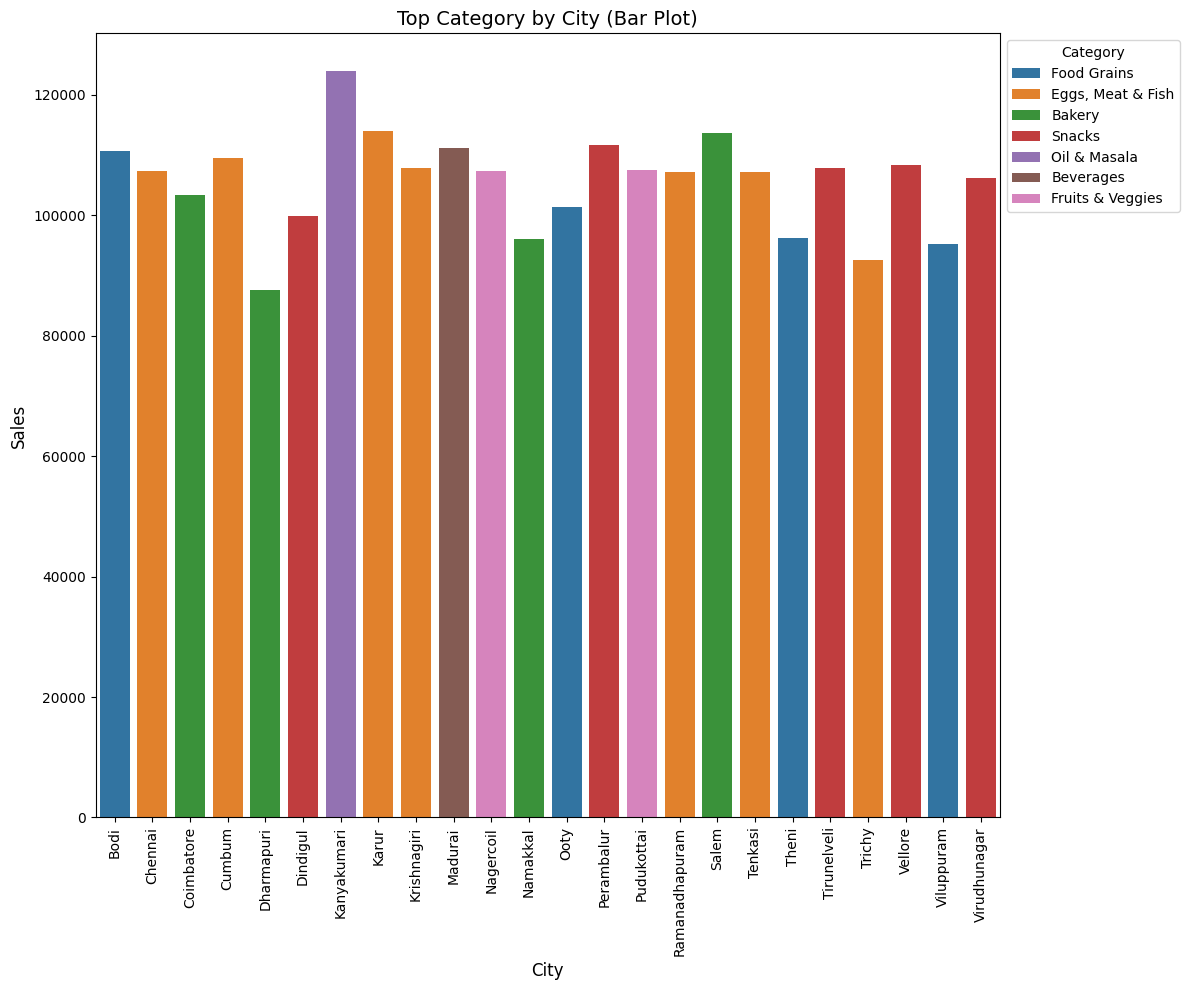

In [40]:
# Grouping by City and Category and summing the Sales
city_category_sales = data.groupby(['City', 'Category'])['Sales'].sum().reset_index()

# For each City, find the Category with the maximum Sales
top_category_by_city = city_category_sales.loc[city_category_sales.groupby('City')['Sales'].idxmax()]

# Display the result
print(top_category_by_city)

# Bar Plot to show top category for each city
plt.figure(figsize=(12,10))
sns.barplot(x='City', y='Sales', hue='Category', data=top_category_by_city, palette='tab10')
plt.xticks(rotation=90)
plt.title('Top Category by City (Bar Plot)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Category")
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [22]:
!pip install dash dash-bootstrap-components plotly seaborn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 13.1 MB/s eta 0:00:00


In [42]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import pandas as pd


# Create visualizations
# 1. Total sales by Category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
fig1 = px.bar(x=category_sales.index, y=category_sales.values, labels={'x':'Category', 'y':'Total Sales'}, title='Total Sales by Category')

# 2. Total sales by Subcategory (Pie chart)
subcategory_sales = data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
fig2 = px.pie(values=subcategory_sales, names=subcategory_sales.index, title='Total Sales by Subcategory')

# 3. Total sales by Region (Donut chart)
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
fig3 = px.pie(values=region_sales, names=region_sales.index, hole=.4, title='Total Sales by Region')

# 4. Top 10 customers by Sales (Horizontal Bar)
top_customers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
fig4 = px.bar(x=top_customers.values, y=top_customers.index, orientation='h', labels={'x':'Total Sales', 'y':'Customer Name'}, title='Top 10 Customers by Sales')

# 5. Average Profit by Category (Point plot)
fig5 = px.scatter(data, x='Profit', y='Category', title='Average Profit by Category')

# 6. Profit by Subcategory (Bar chart)
subcategory_profit = data.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)
fig6 = px.bar(x=subcategory_profit.index, y=subcategory_profit.values, labels={'x':'Subcategory', 'y':'Total Profit'}, title='Total Profit by Subcategory')

# 7. Correlation between Discount and Sales/Profit
discount_sales_corr = data['Discount'].corr(data['Sales'])
discount_profit_corr = data['Discount'].corr(data['Profit'])
corr_text = f'Correlation between Discount and Sales: {discount_sales_corr}\nCorrelation between Discount and Profit: {discount_profit_corr}'

# 8. Total sales by Month (Line chart)
monthly_sales = data.groupby('Order Month')['Sales'].sum()
fig8 = px.line(x=monthly_sales.index, y=monthly_sales.values, labels={'x':'Month', 'y':'Total Sales'}, title='Total Sales by Month')

# 9. Yearly Sales comparison (Heatmap)
pivot_data = data.pivot_table(values='Sales', index='Order Month', columns='Order Year', aggfunc='sum')
fig9 = go.Figure(data=go.Heatmap(z=pivot_data.values, x=pivot_data.columns, y=pivot_data.index, colorscale='YlGnBu'))
fig9.update_layout(title='Monthly Sales by Year', xaxis_title='Year', yaxis_title='Month')

# 10. Total sales by City (Bar chart)
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)
fig10 = px.bar(x=city_sales.values, y=city_sales.index, orientation='h', labels={'x':'Total Sales', 'y':'City'}, title='Total Sales by City')

# 11. Top category for each city (Bar chart with hue)
city_category_sales = data.groupby(['City', 'Category'])['Sales'].sum().reset_index()
top_category_by_city = city_category_sales.loc[city_category_sales.groupby('City')['Sales'].idxmax()]
fig11 = px.bar(top_category_by_city, x='City', y='Sales', color='Category', title='Top Category by City')

# 12. Total sales over time (Line chart)
fig12 = px.line(data.groupby('Order Date')['Sales'].sum().reset_index(), x='Order Date', y='Sales', title='Total Sales Over Time')

# Create the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layout using a landscape shape with more control over spacing and alignment
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Supermarket Grocery Sales Dashboard"), className="text-center mb-4")),

    # First row with 3 visualizations in landscape orientation
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig1), width=4),  # Total sales by Category
        dbc.Col(dcc.Graph(figure=fig2), width=4),  # Total sales by Subcategory
        dbc.Col(dcc.Graph(figure=fig3), width=4),  # Total sales by Region
    ], align="center", justify="around"),

    # Second row with 2 visualizations
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig4), width=6),  # Top 10 customers by Sales
        dbc.Col(dcc.Graph(figure=fig5), width=6),  # Average Profit by Category
    ], align="center", justify="around"),

    # Third row with 2 visualizations and correlations text
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig6), width=6),  # Profit by Subcategory
        dbc.Col(html.Pre(corr_text, style={'whiteSpace': 'pre-wrap', 'fontSize': '16px'}), width=6),
    ], align="center", justify="around"),

    # Fourth row with monthly sales and yearly comparison
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig8), width=6),  # Total sales by Month
        dbc.Col(dcc.Graph(figure=fig9), width=6),  # Yearly Sales Comparison (Heatmap)
    ], align="center", justify="around"),

    # Fifth row with total sales by city and category comparison by city
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig10), width=6),  # Total sales by City
        dbc.Col(dcc.Graph(figure=fig11), width=6),  # Top category by city
    ], align="center", justify="around"),

    # Final row with total sales over time
    dbc.Row(dbc.Col(dcc.Graph(figure=fig12), width=12)),
], fluid=True)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<IPython.core.display.Javascript object>

In [18]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0       11.0            7      2017.0  
1    749      0.18  149.80      0       11.0            7      2017.0  
2   2360      0.21  165.20      0        6.0           11      2017.0  
3    896      0.25   89.60      0       10.0           10      2016.0  
4   2355      0.26  918.45      0       10.0           10      2016.0  


<ipython-input-19-67a55746fb10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='magma')


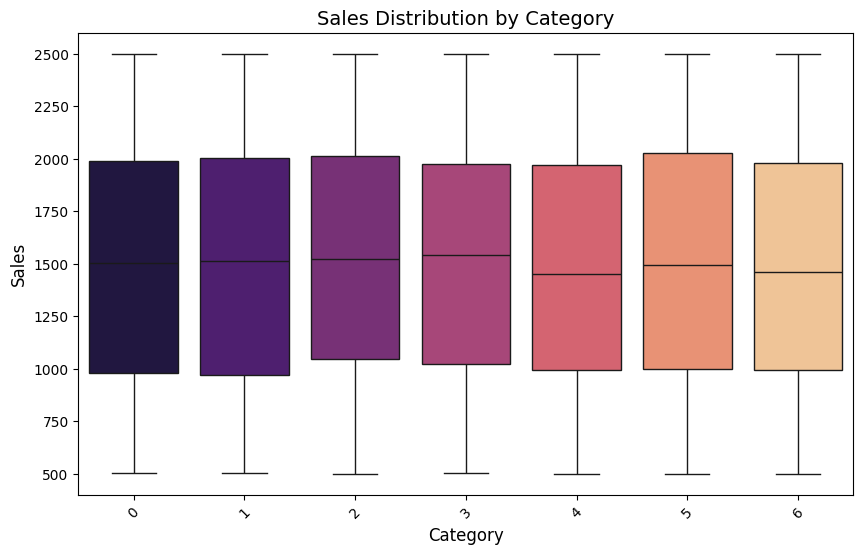

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='magma')
plt.title('Sales Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

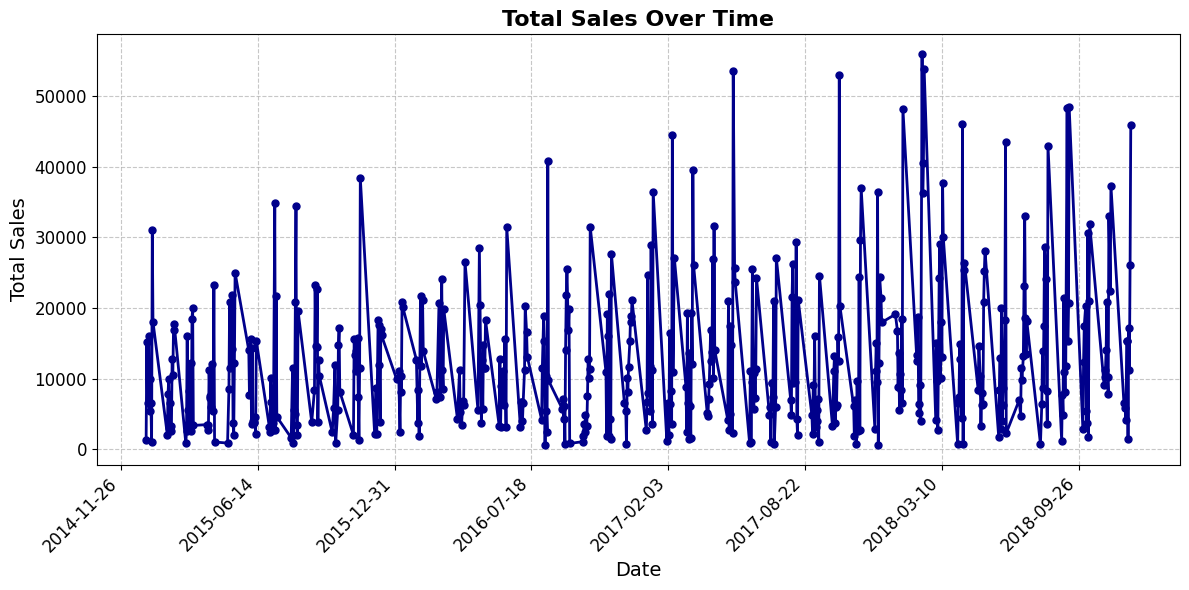

In [20]:
plt.figure(figsize=(12, 6))

# Plotting total sales over time
data.groupby('Order Date')['Sales'].sum().plot(color='darkblue', linestyle='-', marker='o', markersize=5, linewidth=2)

# Adding title and labels with custom font sizes
plt.title('Total Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Formatting the x-axis for better date intervals
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Adding a tight layout for better spacing
plt.tight_layout()

plt.show()

Non-Numeric Columns: Index(['Order ID', 'Customer Name', 'Order Date'], dtype='object')


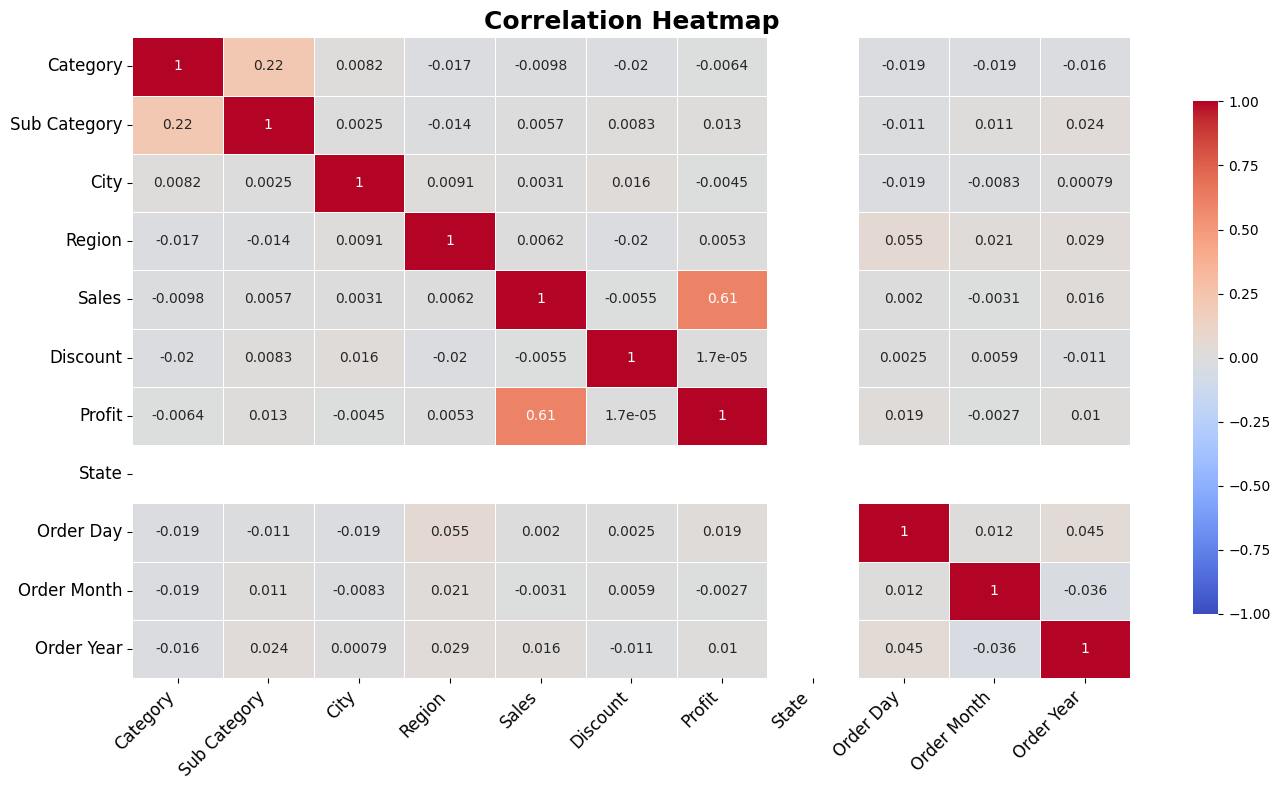

In [ ]:
# Step 1: Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 2: Create a correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Step 3: Plot the heatmap with custom design
plt.figure(figsize=(14, 8))

# Heatmap with annotations and color mapping
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})

# Customizing title and axis labels
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Adding a tight layout for better spacing
plt.tight_layout()

# Step 4: Display non-numeric column names separately
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Print the non-numeric columns for reference
print("Non-Numeric Columns:", non_numeric_columns)

# Show the plot
plt.show()

In [ ]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'Sales', 'Order Month'])
target = data['Sales']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Train a HistGradientBoostingRegressor Model
# Initialize the model
model = HistGradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 382.76214027643766
Mean Squared Error (MSE): 218729.65490461956
Root Mean Squared Error (RMSE): 467.68542301916955
R-squared (R2): 0.33681430676111623


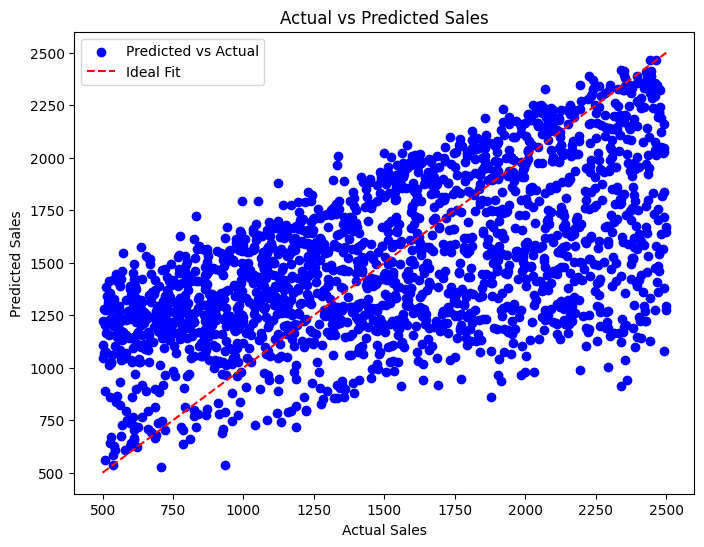

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()